In [1]:
import csv
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef as MC
from sklearn.metrics import ConfusionMatrixDisplay as CMD
import matplotlib.pyplot as plt
from collections import Counter as Cnt
import geopandas as gpd
import pickle
import pandas as pd
import json
import random
#matthews corrcoef https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [2]:
with open("../../country_data_final.pickle", 'rb') as handle:
    data = pickle.load(handle)
with open("../../mapillary/train.json") as file:
    metadata = json.load(file)

In [ ]:
#TODO
# use matthews corrcoef
# 

# NOTES
max100 states has the following "issues"

New Hampshire has 0 and District of Columbia is included with 100

'Oklahoma': 73,'Vermont': 7,'Nebraska': 68,'Maine': 92

In [3]:
result_file = "country100_results.csv"
# result_file =  "US_states_max100_results.csv"
# result_file = "city100_results.csv"
# result_file = "country100_results_test.csv"



In [6]:
labelspair = []
counter = 0
with open(f'../resultcsv/{result_file}', encoding="utf-8",newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        if row[0]=="Gold":
            continue
        gold = row[0]
        preds = row[1][2:-2].split(", ")
        preds = [x.strip("'") for x in preds]
        probs = row[2][2:-2].split(", ")
        probs = [float(x) for x in probs]
        filename = row[3]
        labelspair.append([gold,preds,probs,filename])

gold = [x[0] for x in labelspair]
predict = [x[1][0] for x in labelspair]
predicts = [x[1] for x in labelspair]
probs = [x[2] for x in labelspair]
filenames = [x[3] for x in labelspair]
len(set(predict))

114

In [16]:
labelspair[0][3]

'I2bZIA3vJauI6rm_OV3Z7w'

In [18]:
MC(gold,predict)

0.5068820988312078

Matthews corrcoef

country100: 0.51

US States 100: 0.42

City 100: 0.20



In [27]:
acc_list = {}
for g, p in zip(gold,predict):
    if g == p:
        acc_list.setdefault(g,0)
        acc_list[g]+=1
acc_list = [(x,y) for x,y in acc_list.items()]
acc_list.sort(reverse=True,key=lambda x : x[1])


In [19]:
# acc_list

In [22]:
# Cnt(gold) # For states t

In [23]:
#print(set(gold))

In [21]:
# Select specific labels to display and focus on. Other values are changed to label "other"
# selection = ['China', 'Japan', 'Sri Lanka','Australia','United Kingdom','Egypt','United States','Kosovo','Cyprus',"France"]
# selection = ['South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
# selection = ['Belgium','South Korea', 'Democratic Republic of the Congo', 'Nigeria', 'Haiti', 'Mozambique', 'Nicaragua', 'Luxembourg', 'Saint Lucia', 'Namibia', 'Barbados','United States', 'Australia', 'Japan', 'Brazil', 'Germany', 'Morocco', 'Thailand', 'France', 'South Africa', 'Colombia']
selection = ["Namibia", 'Botswana', 'Zambia', 'Angola', 'South Africa', 'Zimbabwe', 'Mozambique','Democratic Republic of the Congo','Kenya','Ethiopia','Nigeria','Egypt']
selection = ['Dubai','Abu Dhabi', 'Buenos Aires', 'Bangkok', 'Rio de Janeiro',  'Helsingborg','Boston', 'Detroit','Hamburg','Singapore','Berlin','Sydney','Rome','Los Angeles','Kyoto','Tokyo','New York'] 
# selection = ['Vermont', 'Alabama', 'Pennsylvania', 'Louisiana', 'North Carolina', 'Hawaii', 'New Mexico', 'Arizona', 'Minnesota', 'Missouri','New York']
goldsel = []
predsel = []
for g, p in zip(gold,predict):
   
    if g in selection:
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            p = "other"
            goldsel.append(g)
            predsel.append(p)
    else:
        g = "other"
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            continue
            #These are commented out to avoid saturation of "other" in confusion matrix
#             p = "other"
#             goldsel.append(g)
#             predsel.append(p)



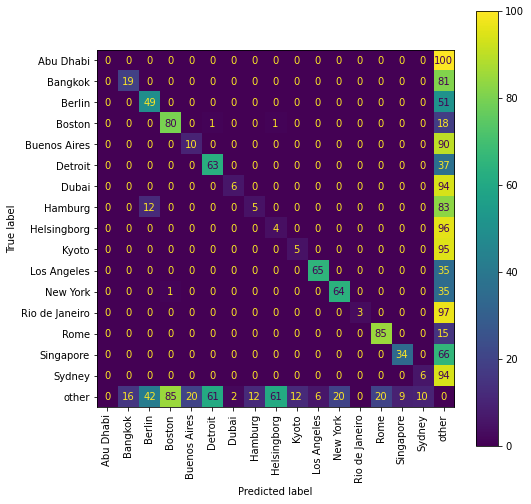

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)
# plt.savefig("topbot10_count_CM_wbelg.png")

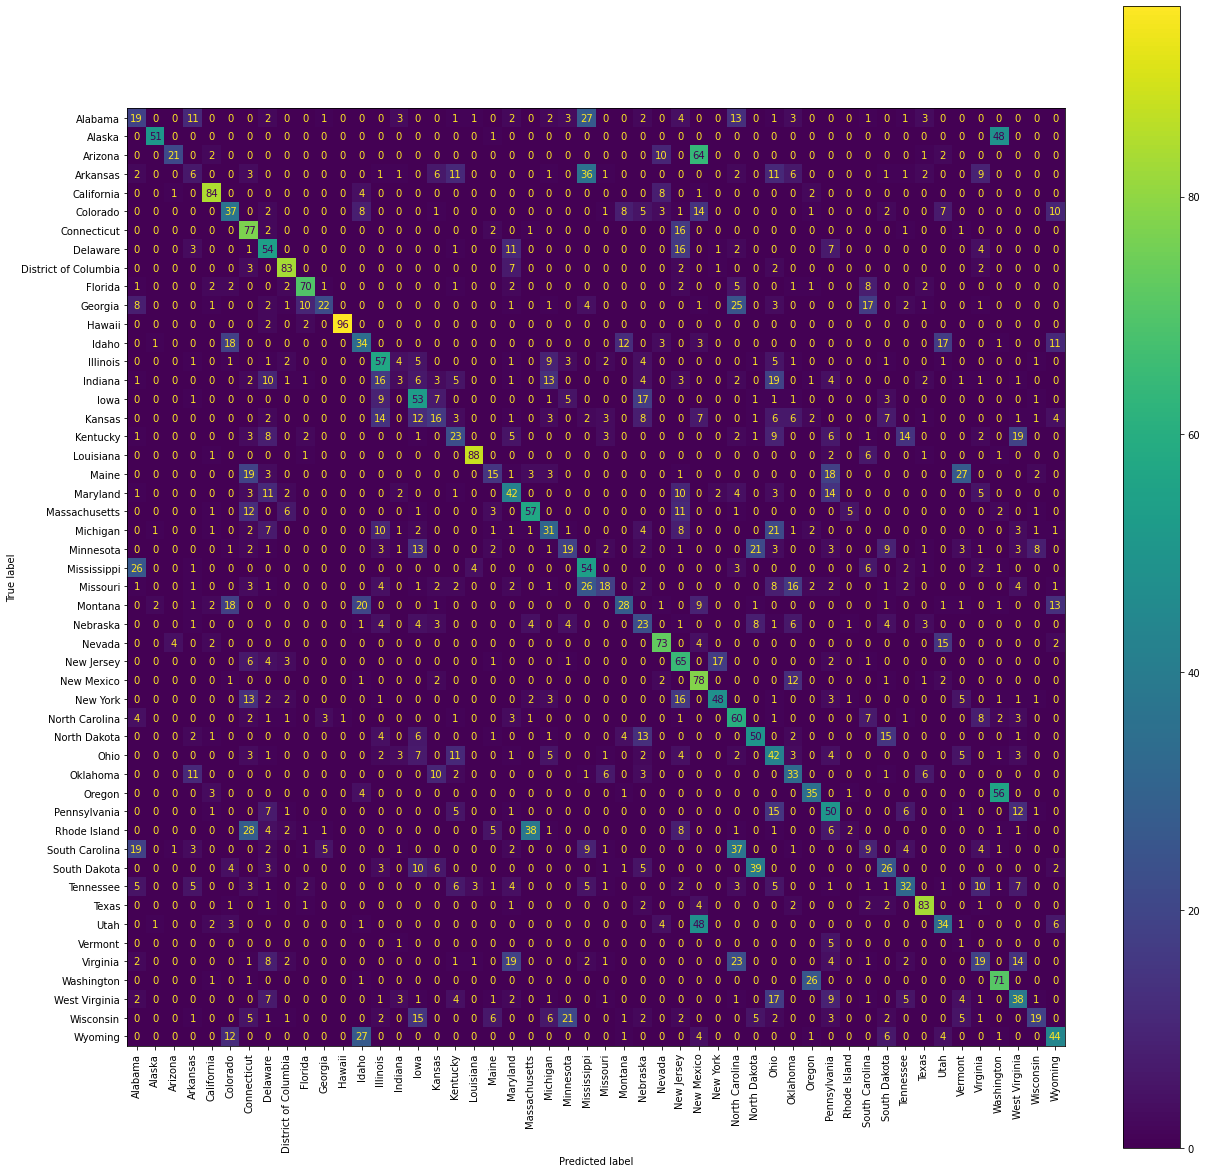

In [35]:


fig, ax = plt.subplots(figsize=(21, 21))

CMD.from_predictions(gold,predict,xticks_rotation="vertical",ax=ax)#
# plt.savefig("allstate_CM.png")

In [7]:
# Select specific label to display and focus on. Other values are changed to label "other"
selection = "Namibia"
goldsel = []
predsel = []
indices = []
for i, (g, p) in enumerate(zip(gold,predict)):
   
    if g == selection:
        indices.append(i)
        goldsel.append(g)
        predsel.append(p)
    else:
        g = "other"
        if p == selection:
            indices.append(i)
            goldsel.append(g)
            predsel.append(p)
        else:
            continue
            #These are commented out to avoid saturation of "other" in confusion matrix
#             p = "other"
#             goldsel.append(g)
#             predsel.append(p)



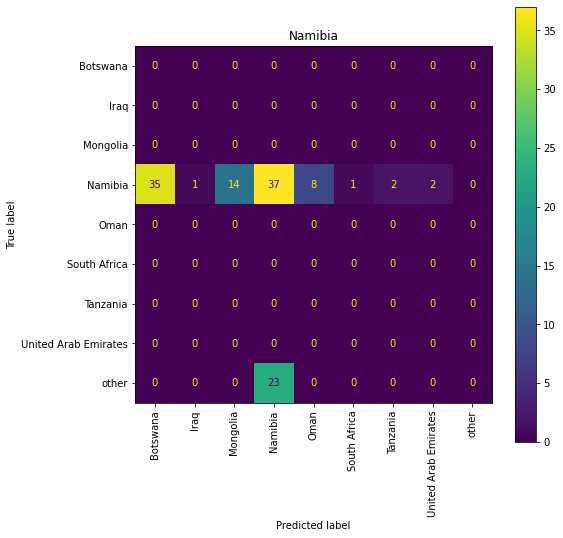

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title(selection)

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax)

# Image plot

In [10]:
mon_list = [i for i in indices if predict[i]=="Mongolia"]
mon_list = [labelspair[i][3] for i in mon_list]
# mon_list = random.choices(mon_list,k=9)
with open(f"../figureinput/namibia_mong_conf.pickle", 'wb') as handle:
        pickle.dump(mon_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
import sys, os, pickle
from PIL import Image

img_src = "/home/data_shares/mapillary/train/"
img_list = sys.argv[1]
with open(os.path.join("../figureinput",img_list), 'rb') as handle:
    image_list = pickle.load(handle)
    
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
image_gen = iter(image_list)

plt.title(img_list[:-7])
for row in ax:
    for col in row:
        filename = next(image_gen)
        image = Image.open(os.path.join(img_src,filename+".jpg")).convert("RGB")
        col.imshow(image)

plt.tight_layout()
plt.savefig(os.path.join("../figures/", img_list[:-7]+".png"))


SyntaxError: invalid syntax (Temp/ipykernel_9536/1675685638.py, line 20)

In [46]:
os.path.basename("/iasdfadf.jpg")

'iasdfadf.jpg'

In [11]:
road = 0
count = 0
roadfiles = []
nonroadfiles = []
for file in data.keys():
    try:
        data[file]["road"]
        road += 1
        roadfiles.append(file)
    except:
        count += 1
        nonroadfiles.append(file)
        print(data[file])
        print(file)
        # break
        if count == 5:
            break
        continue
print(road)

{'neighbourhood': 'Inara', 'suburb': 'Menara', 'city': 'arrondissement de Menara المنارة', 'county': 'Marrakesh', 'state_district': 'Marrakesh Prefecture', 'region': 'Marrakech-Safi', 'postcode': '40140', 'country': 'Morocco', 'country_code': 'ma'}
-OFvSOupvsTz5jOFUBynkg
{'isolated_dwelling': 'Moulin de Grange', 'suburb': 'Sainte-Pezenne', 'town': 'Niort', 'municipality': 'Niort', 'county': 'Deux-Sèvres', 'state': 'New Aquitaine', 'region': 'Metropolitan France', 'postcode': '79000', 'country': 'France', 'country_code': 'fr'}
-5S2fq2-9fYGLh0kZeY7Lw
{'state': 'Nakhon Nayok Province', 'country': 'Thailand', 'country_code': 'th'}
-hxo9tApY5-aBwbNXL8Mvg
{'county': 'Cajamarca', 'state_district': 'Centro', 'state': 'Tolima', 'country': 'Colombia', 'country_code': 'co'}
0SJVmXcMfJTYhmiwyl-86A
{'suburb': 'Barrio Obrero Industrial', 'city': 'San Martín de Porres', 'region': 'Province of Lima', 'state': 'Lima', 'postcode': 'L31', 'country': 'Peru', 'country_code': 'pe'}
-SSxkAjJPb49YwafRfOkQg
63

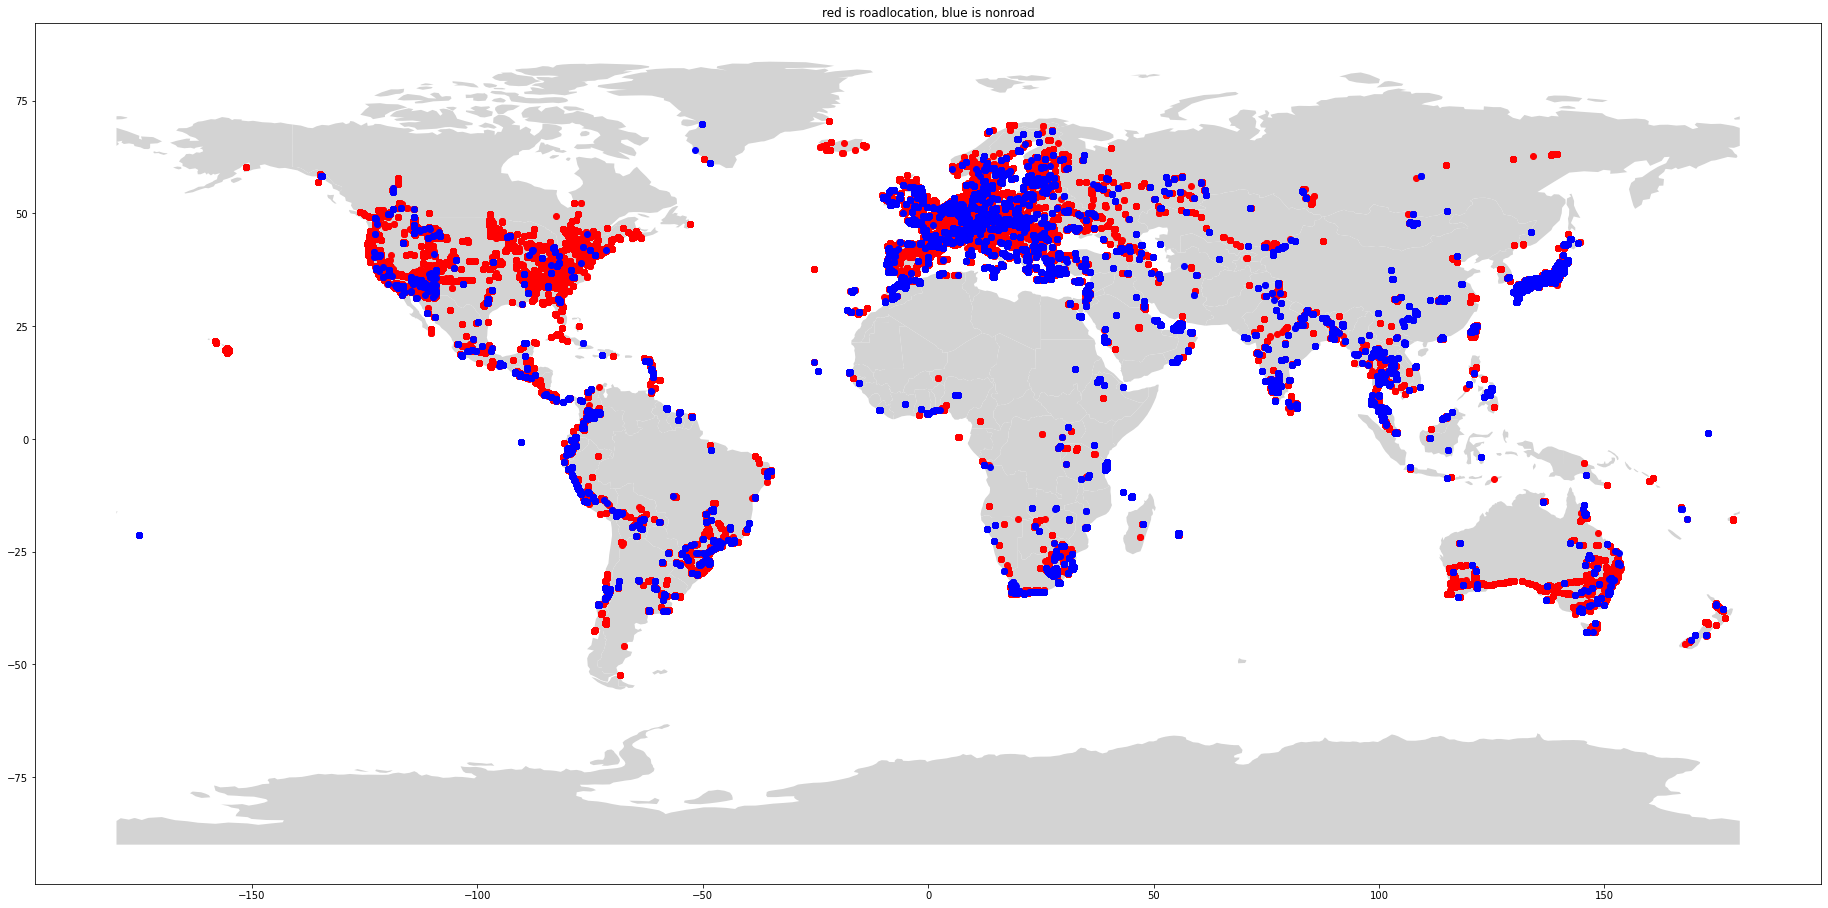

In [9]:
long_list = [metadata[file]["lon"] for file in nonroadfiles]
lat_list = [metadata[file]["lat"] for file in nonroadfiles]
long_list2 = [metadata[file]["lon"] for file in roadfiles]
lat_list2 = [metadata[file]["lat"] for file in roadfiles]
# filename_set = set(filename_list)
df2 = pd.DataFrame(list(zip(long_list2,lat_list2)), columns =['long',"lat"])
df = pd.DataFrame(list(zip(long_list,lat_list)), columns =['long',"lat"])

#initialize an axis
fig, ax = plt.subplots(figsize=(32,32))
# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey", ax=ax)
plt.scatter(x = df2["long"], y=df2["lat"],c="red")
plt.scatter(x = df["long"], y=df["lat"],c="blue")

# df2.plot(x="long", y="lat", kind="scatter", 
#          colormap="YlOrRd",c="red", 
#         ax=ax[0])


plt.title('red is roadlocation, blue is nonroad')
plt.savefig("road.png")

for large countries i.e with 10000 plus images find region name i.e state or province
loop through each country
    when possible loop through each region
        for each road
            check that distance is greater than 10km
            
        for each nonroad
            check that distance is greater than 10km
            
    when not possible to loop through each region
        for each road
            check that distance is greater than 10km
        for each non road
            check that distance is greater than 10km
            
if distance atleast 1km add file to list of acceptable files
if distance less than 1km add file to list of unacceptable files


In [3]:
test = list(data.keys())[0]

In [14]:
uniq_countries = set()
for file in data.keys():
    try:
        uniq_countries.add(data[file]["country"])
    except:
        pass
                           

In [ ]:
uniq_countries_list =  list(uniq_countries)
uniq_countries_list.sort()
for country in uniq_countries_list:
   
